In [118]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from prophet import Prophet
from sklearn.metrics import mean_absolute_error

In [119]:
# Loading the Dataset and checking for any missing values
df = pd.read_csv('Cleaned_Web_Traffic.csv')
df.head()

,Date,Visits
0,01-01-2020,1554.0
1,01-02-2020,2820.0
2,01-03-2020,2970.0
3,01-04-2020,2111.0
4,01-05-2020,2393.0


In [120]:
# Converting 'Date' columbm into datetime format and renaming columns to fit into the Prophet Model
df['Date'] = pd.to_datetime(df['Date'])
df = df.rename(columns={'Date': 'ds', 'Visits': 'y'})

In [121]:
df.head()

,ds,y
0,2020-01-01,1554.0
1,2020-01-02,2820.0
2,2020-01-03,2970.0
3,2020-01-04,2111.0
4,2020-01-05,2393.0


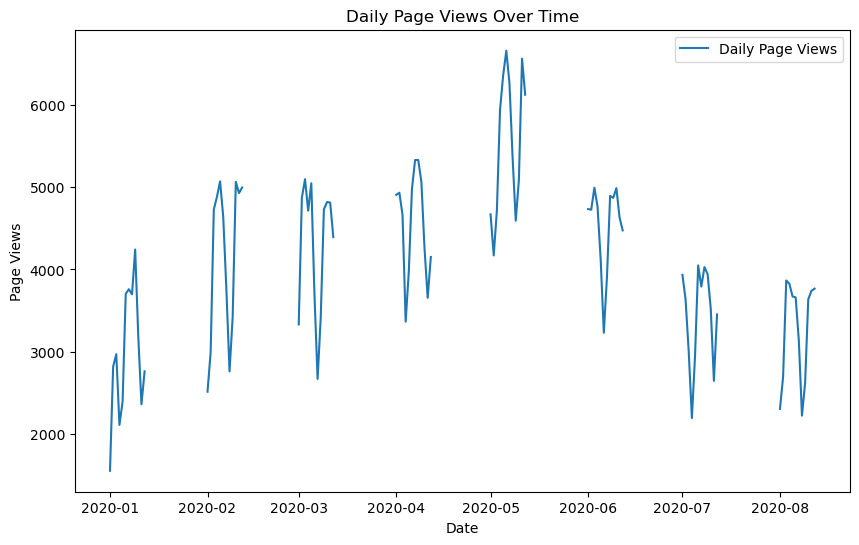

In [122]:
# Plot the historical data
plt.figure(figsize=(10, 6))
plt.plot(df['ds'], df['y'], label='Daily Page Views')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('Daily Page Views Over Time')
plt.legend()
plt.show()

In [140]:
# Model Selected: Facebook Prophet
model = Prophet()
model.fit(df)
future = model.make_future_dataframe(periods=30)
forecast = model.predict(future)

20:00:42 - cmdstanpy - INFO - Chain [1] start processing
20:00:42 - cmdstanpy - INFO - Chain [1] done processing


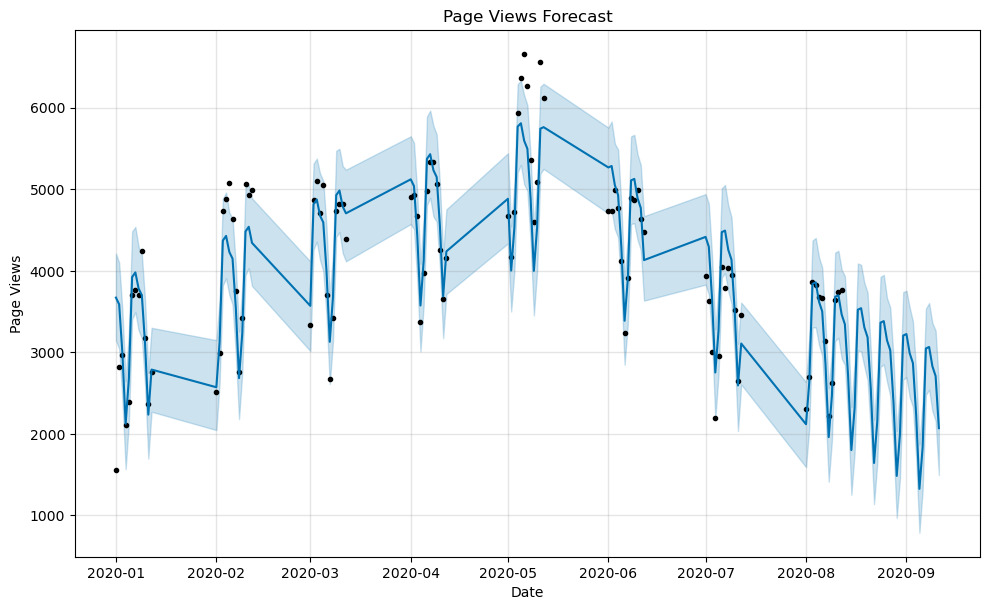

In [142]:
# Data Visualization
fig = model.plot(forecast)
plt.title('Page Views Forecast')
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.show()

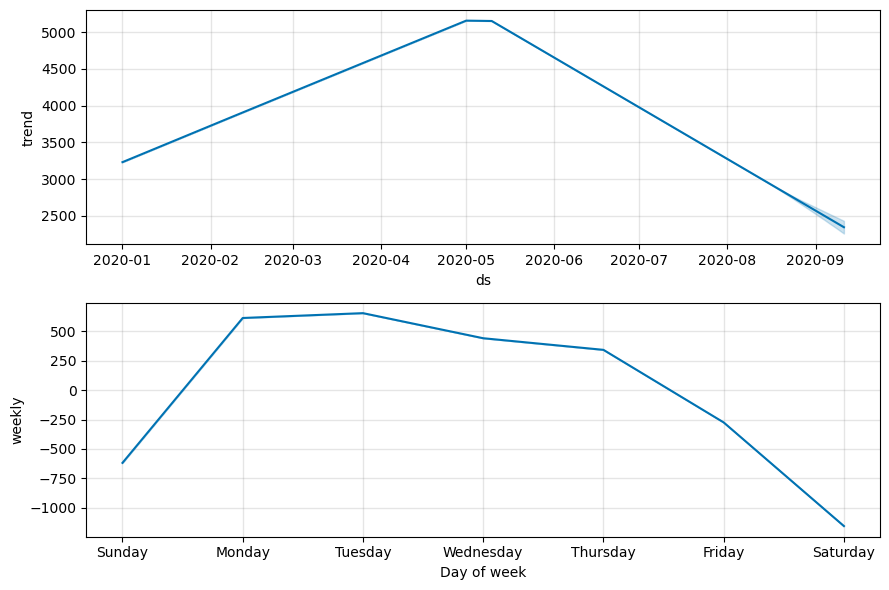

In [144]:
fig2 = model.plot_components(forecast)
plt.show()

In [146]:
df1 = pd.merge(df, forecast[['ds', 'yhat']], on='ds', how='left')

In [148]:
df = df.dropna()

In [154]:
# Model Evaluation
mae = mean_absolute_error(df1['y'], df1['yhat'])
print(f'Mean Absolute Error: {mae:.2f}')

Mean Absolute Error: 296.82
